# Tanaya APP


### Clone repo

In [1]:
# Run once
!git clone https://github.com/Tanaya-id/tanaya-capstone.git

Cloning into 'tanaya-capstone'...
remote: Enumerating objects: 912, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (209/209), done.
remote: Total 912 (delta 23), reused 204 (delta 12), pack-reused 686
Receiving objects: 100% (912/912), 63.18 MiB | 24.29 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
import os

base_dir = 'tanaya-capstone/notebooks/train'

alluvial_dir = os.path.join(base_dir, 'aluvial')
black_dir = os.path.join(base_dir, 'black')
clay_dir = os.path.join(base_dir, 'clay')
red_dir = os.path.join(base_dir, 'red')

print('total training alluvial images:', len(os.listdir(alluvial_dir)))

alluvial_files = os.listdir(alluvial_dir)
print(alluvial_files[:10])

total training alluvial images: 500
['223.jpg', '317.jpg', '225.jpg', '82.jpeg', '99.jpg', '78.jpeg', '188.jpg', '144.jpg', '59.jpg', '430.jpg']


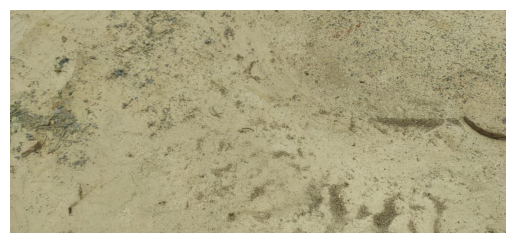

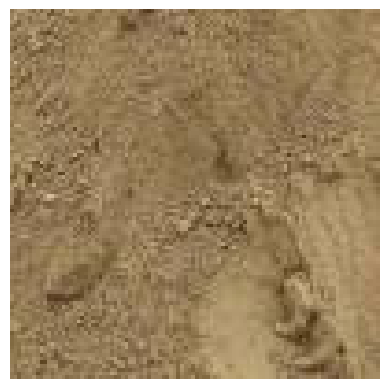

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_alluvial = [os.path.join(alluvial_dir, fname) 
                for fname in alluvial_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_alluvial):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [6]:
# Download module, Run once
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00


In [7]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tanaya-capstone/notebooks/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tanaya-capstone/notebooks/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=50
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=15
)

Found 1149 images belonging to 4 classes.
Found 333 images belonging to 4 classes.


In [8]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=23, validation_data = validation_generator, verbose = 1, validation_steps=5)

Epoch 1/25
23/23 [==============================] - 36s 928ms/step - loss: 1.1063 - accuracy: 0.5840 - val_loss: 0.8860 - val_accuracy: 0.6533
Epoch 2/25
23/23 [==============================] - 17s 716ms/step - loss: 0.7341 - accuracy: 0.7215 - val_loss: 0.8786 - val_accuracy: 0.6800
Epoch 3/25
23/23 [==============================] - 17s 736ms/step - loss: 0.5665 - accuracy: 0.7807 - val_loss: 0.5959 - val_accuracy: 0.8000
Epoch 4/25
23/23 [==============================] - 16s 672ms/step - loss: 0.4933 - accuracy: 0.7911 - val_loss: 0.6162 - val_accuracy: 0.8000
Epoch 5/25
23/23 [==============================] - 16s 710ms/step - loss: 0.4920 - accuracy: 0.7972 - val_loss: 0.3052 - val_accuracy: 0.8667
Epoch 6/25
23/23 [==============================] - 16s 720ms/step - loss: 0.3867 - accuracy: 0.8259 - val_loss: 0.2674 - val_accuracy: 0.8933
Epoch 7/25
23/23 [==============================] - 19s 854ms/step - loss: 0.3378 - accuracy: 0.8460 - val_loss: 0.4388 - val_accuracy: 0.8133

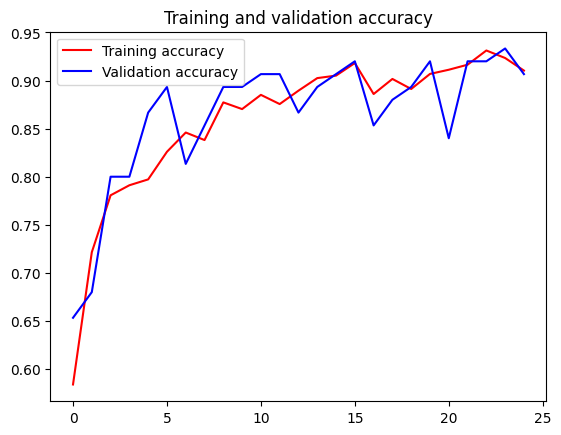

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print("[aluvial, black, clay, red]")
  print(classes)

In [11]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)